# ORIE 4580/5580/5581 Assignment 2

#### Students: Riley Coogan (rmc329) and Oscar Callamari-Abrams (oc67)

### Instructions


* Due Thursday September 11, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 4 and 6 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell. You can skip things that seem more advanced, like the Beta distribution in $Ch\, 4$ and the part on queueing in $Ch\,6$ - the part about paradoxes in probability is also strictly speaking not required$\ldots$(but I would never recommend *not* reading that!)

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


---

---

## Question 1: Practice with expectation and variance (25 pts)



---


**(a)** Given a coin which comes up *Heads* with probability $p$, let $N_p$ denote the number of times the coin is tossed until the first *Heads*. Argue that $$N_p = \begin{cases} 1 & \text{with probability } p\\ 1+\tilde{N}_p & \text{with probability } 1-p \end{cases}$$
where $\tilde{N}_p$ is an independent random variable with the same distribution as $N_p$.
Using this, show that $\mathbb{E}[N_p] = 1/p$. Also use a similar argument to find $Var(N_p)$.

*Note: The rv $N_p$ is said to be a Geometric$(p)$ rv; it has pmf $p(k) = (1-p)^{k-1}p$.*



---



### Ans.

If the coin comes up tails, then it has no impact on future flips and it is as if we are starting over but the count is one greater

Let E be the Expectation of $N_p$

E= 1+(1-p)E -> 0=1-pE -> E=1/p

Now let S be E($N_p^2$)

$S= p*1+(1-p)(1+E)^2 ->pS = 1+2(1-p)E -> (2-p)/p^2$

Therefore,

Var($N_p$)= $S-E^2 = (1-p)/p^2$



___

**(b)** In the previous assignment you estimated $\pi$ by sampling uniform random points $(X,Y)$ in $[-1,1]\times[-1,1]$, and checking if they fell within the circle. Suppose instead you sampled $n$ points uniformly in $[0,1]\times[0,1]$ and checked if $X^2+Y^2\leq 1$. Let $N_c$ be the number of points satisfying this; what is $\mathbb{E}[N_c]$ and $\text{Var}(N_c)$? Can you use this to get a better estimate of $\pi$ (i.e., with tighter confidence intervals given the same number of samples $n$)?

___

### Ans.

The expectation and variance are the same. The estimate will be just as effective, since the simulation still reflects a binomial with N=n and p= pi/4 as the proportion of the area of a quarter unit circle vs. a 1x1 square is the same as a full circle vs. a 2x2 square (4x larger).

---
**(c)** The elevators in Rhodes Hall stop at $6$ floors. Suppose one morning you get in on the ground floor with $3$ other people, and each one of you wants to go to a floor in $\{2,3,4,5,6\}$ chosen uniformly at random, and independently of the others' choices. At how many floors will the elevator stop on average?


---

### Ans.

Let $X_i$ be a random bernoulli variable which is 1 with prob $1-(4/5)^4$, representing floor i being visited

Then # of floors = sum of $X_i$ for i=2...6 =5*p=2.952


---

(d) For your next simulation homework, you pair up with a student you have not met before. At some point, you get bored of the homework, and decide to count how many common friends you have at Cornell. Suppose the total number of students at Cornell is $22,000$, out of which you have $500$ friends, and your homework partner has $440$. Assuming that for both of you, your friends form independent and uniform random samplings of the total student population, what is the expected number of friends you both have in common?

---

### Ans.

500*440/22000 = 10

___
___

## Question 2: Pooled Testing (30 pts) ##


In 2020 Fall, Cornell adopted pooled testing to test a large population with a limited number of Covid tests. In pooled testing a sample is taken from each person and split into two subsamples. The first subsample from each person is pooled with those of $n-1$ other people into a single pooled sample of size $n$ people. (Cornell eventually used $n=5$.) If the pooled test comes back negative, then we declare all $n$ people in the pool to be
negative. If the pooled test comes back positive, we then individually test the second subsample from every person in the pool. In this question we'll explore the effects of different pool sizes $n$.

---

**(a)** The *prevalence* $p$ at the time of testing is defined to be the true fraction of people with Covid in the population. Now let $N$ be the number of (true) Covid-positive people in a pool of size $n$. What would you use as a model for the distribution of $N$, if you knew the $n$ people in the pool $(i)$ had never met each other in the last week, and $(ii)$ all lived in the same house. In each case, what is the mean and variance of $N$?

---

### Ans.

(i) Because the people have not met, it would make most sense to treat their individual sickness statuses as independent bernoulli variables, meaning N will be a binomial(n, p).

The mean of a binomial(n, p) rv is $n\times p = np$

The variance of a binomial(n, p) rv is $npq=np(1-p)$

(ii) When the people live in the same house, we have to assume that there is a large positive correlation between individuals within the same household. If one person in the house is positive, it is quite likely most others do as well. I would use a model with a lot of clustering, highlighting the large dependence.

While a more accurate model could be used, a fairly reasonable and simple way to model this scenario is with a bernoulli distribution, where 0 people are infected with probability (1-p), and all n people are infected with probability p.

We would then have the same mean as scenario (i), but now the variance would be:

$(0)^2(1-p)+n^2p - n^2p^2 = n^2p(1-p)$

We can see that now the variance is higher, reflecting the way in which living together increases the odds of a pool having all negative or all positive results.

___

**(b)** Suppose that the test has no *false positives* and no *false negatives*; it comes back positive if **anyone** in the pool is positive and comes back negative if all people in the pool are negative. Let $T$ be the number of tests you need to be *sure* of each persons status (i.e., if they are COVID positive or not). What is the distribution of $T$, and what is its mean and variance? Clearly state all assumptions you are making.

---

### Ans.

If a test comes back negative, then we only need 1 test to be sure of status of all n people. If it comes back positive, we would need to then test all n people to be sure of everyone's status, so n + 1 tests. T can then be modeled as a discrete rv taking on 2 possible values.

$T=1 \text{ with probability }(1-p)^{n}$

$T=1+n \text{ with probability } 1-(1-p)^n$

$\mathbb{E}[T]=(1)(1-p)^n + (1+n)(1-(1-p)^n) \\
= (1-p)^n(1+n)-(1-p)^n(1+n)\\
= (1-p)^n(-n)+(1+n)\\
= 1 + n-n(1-p)^n\\
\mathbb{E}[T^2]=(1^2)(1-p)^n + (1+n)^2(1-(1-p)^n)\\
=(1-p)^n + (n^2 + 2n + 1)(1-(1-p)^n))\\
=1+2n+n^2-(1-p)^n(n^2+2n)$


Let $q=(1-p)^n$

$(1+n-nq)^2=n^2q^2-2n^2q-2nq+n^2+2n+1\\
Var(T)=[1+2n+n^2-q(n^2+2n)] - [n^2q^2-2n^2q-2nq+n^2+2n+1]\\
=-n^2q^2+n^2q\\
=n^2q(1-q)\\
=n^2(1-p)^n(1-(1-p)^n)$

Assumptions made are no false pos/neg tests and that individuals in a pool are independent with respect to the probability that they have or dont have covid.

___

**(c)** What is the pool size $n$ that minimizes the average number of tests per person when the prevalence is $0.0001$? What about when prevalence is $0.01$? You should do this numerically using plots (i.e., without calculus), as this is helps explain your recommendation to decision-makers (note though that you may want to test different ranges of $n$ for each setting).

---

### Ans.



1


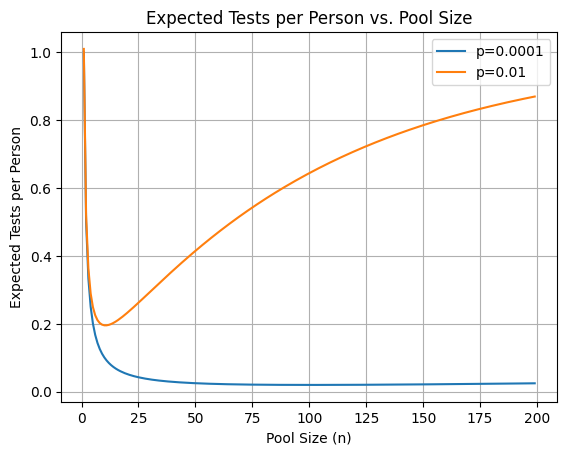

Pool size n to see minimum expected avg tests of 0.019950656341507198 per person for p of 0.0001 is: 100
Pool size n to see minimum expected avg tests of 0.19557083665037453 per person for p of 0.01 is: 10


In [ ]:
n = np.arange(1, 200, 1)
print(n[0])
p = [0.0001, 0.01]
means = []

for prev in p:
  n_results = []
  for i in range(len(n)):
    exp_tests_per_person = (1 + n[i] - n[i] * ((1-prev)**n[i])) / n[i]
    n_results.append(exp_tests_per_person)
  means.append(n_results)

plt.plot(n, means[0], label="p=0.0001")
plt.plot(n, means[1], label="p=0.01")
plt.xlabel("Pool Size (n)")
plt.ylabel("Expected Tests per Person")
plt.title("Expected Tests per Person vs. Pool Size")
plt.legend()
plt.grid(True)
plt.show()

for i in range(len(p)):
  prev = p[i]
  min_exp_tests = np.min(means[i])
  min_index = means[i].index(min_exp_tests)
  optimal_n = n[min_index]
  print(f"Pool size n to see minimum expected avg tests of {min_exp_tests} per person for p of {prev} is: {optimal_n-1}")



---

*(d)* A more critical characteristic of pooled tests is the false negative rate, which is the probability that a test comes back negative when at least one person in the pool is Covid positive. False negatives are dangerous, because the person (or people) with Covid in the pool can infect others until Covid is otherwise detected or they become no longer infectious.

You know that false negatives must be more likely when there is a low viral load in a sample. To understand how to model false negatives in PCR tests, you consult with your friend who is a biologist, who tells you that the viral load $V$ in a PCR sample is measured using something called the cycle threshold (CT) score of a PCR test, which is equivalent to $C = -\log_2 V$. The viral load for a Covid-negative person is $V=0$. In a pooled sample of size $n$, each person contributes a fraction $1/n$ of the sample, and the resulting viral load has a total CT score of:
$$-\log_2 \left(\frac 1 n \sum_{i=1}^n 2^{-C_i}\right),$$
where $C_1, C_2, \ldots, C_n$ are the CT scores of each person in the pool. Finally, your friend recalls that probability $\mathbb{P}[\text{false positive test}|C]$ of a false negative in a single PCR test is well modeled either as
$\frac{1}{1 + \exp(-10(C - 35))}$ or $\frac{1}{1 + \exp(10(C - 35))}$ (but he can not remember which one 🙁).

Can you figure out what the correct model is?

---



Ignore " ℙ[false positive test|𝐶]" and please express what the correct model is for the probability of false negatives.

### Ans.

From the given CT formula, we can see that a low V corresponds to a large CT score, and high V to a low CT score. Because false negatives are more likely when there is a low V, we are then looking for a model that increases as C increases.

Because for both models have C in the denominator, we want the denominator to decrease as C increases. This means we want the exp expression to get smaller as C increases. For a very large C, model 1 will have the power of e be a large negative number, which brings the exp function closer to 0, which we want. For the 2nd model, a large C will bring the exp function to large number, meaning as C gets bigger, so does the dominator which is not what we want.

Thus, the first model is correct, as the smaller V is, the larger it says the probability of a false negative occuring will be.





---


*(e)* You consult the epidemiology literature and find that the viral load for a Covid-positive person has been found from data to have a CT score $C$ that is well modeled via a *mixture of Gaussian* distribution as follows: with probability $0.40$, $C$ is $\mathcal{N}(20, 3.5^2)$ (i.e., normally distributed with mean 20 and variance $3.5^2$); with probability $0.5$, $C$ is $\mathcal{N}(30, 3^2)$, and otherwise,  $C$ is $\mathcal{N}(34.78, 1.32^2)$.

Use this data with the above model to estimate the probability of a false negative in a pooled test of size $n$ containing a single Covid-positive person as a function of $n$. You'll need to generate, say, $m$ replications of the pooled test at each value of $n$, where you should choose $m$ to ensure that your results are meaningful. Report your results as a graph with the false negative rate on the $y$-axis and the pool size $n$ ranging from 1 to 50 on the $x$-axis. Select your simulation runlength so that your estimates would be useful in practice (for example, estimates that are $\pm$ 0.02 or so are sufficiently accurate).


---


### Ans.



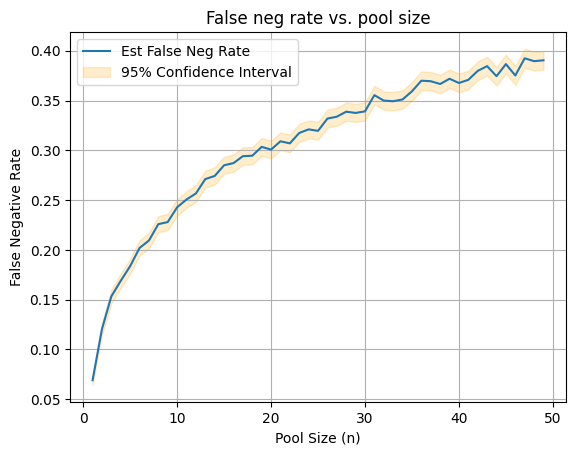

In [ ]:
def viral_dist(rand_num):
  if rand_num < 0.4:
    return np.random.normal(20, 3.5)
  elif rand_num < 0.9:
    return np.random.normal(30, 3)
  else:
    return np.random.normal(34.78, 1.32)

def model(c):
  return 1/(1+np.exp(-10*(c-35)))

def est_ci(success_count, ntrials, ci=0.95):
  phat = success_count/ntrials
  zscore = stats.norm.ppf((1+ci)/2)
  marg_error = zscore * np.sqrt(phat * (1-phat)/ntrials)
  return phat-marg_error, phat+marg_error

n = np.arange(1, 50, 1)
m = 10000

avgs = []
cis = []

for i in range(len(n)):
  sum_probs = 0
  for j in range(m):
    rand_num = np.random.uniform()
    c = viral_dist(rand_num)
    cum = -np.log2(2**(-1*c)/n[i])
    prob_false_negative = model(cum)
    sum_probs += prob_false_negative

  avg_prob = sum_probs / m
  avgs.append(avg_prob)

  individual_probs = []
  for j in range(m):
    rand_num = np.random.uniform()
    c = viral_dist(rand_num)
    cum = -np.log2(2**(-1*c)/n[i])
    individual_probs.append(model(cum))

  std_dev = np.std(individual_probs)
  margin_error = stats.norm.ppf(0.975) * (std_dev / np.sqrt(m)) # 95% CI
  cis.append((avg_prob - margin_error, avg_prob + margin_error))


lower_ci = [ci[0] for ci in cis]
upper_ci = [ci[1] for ci in cis]

plt.plot(n, avgs, label='Est False Neg Rate')
plt.fill_between(n, lower_ci, upper_ci, color='orange', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Pool Size (n)")
plt.ylabel("False Negative Rate")
plt.title("False neg rate vs. pool size")
plt.legend()
plt.grid(True)
plt.show()

## Question 3: Buffon and his magic needle (20 points)

In the first class we saw Buffon's needle experiment in which we drop needles of length 1 on a floor of parallel lines that are equally spaced 1 unit apart. If we drop $n$ needles and $N_{cross}$ of them cross a line, then an estimate of $\pi$ is $\hat{\pi}_n = 2n/N_{cross}$. We will now study how this works in practice (feel free to use the code provided in class).

In [ ]:
def buffon(N,length,dist,num_lines = 2,seed=-1):
    """
    Generates a design matrix with Gaussian basis functions

    Parameters
    ----------
    N: number of throws
    length: length of toothpick
    dist: distance between lines
    num_lines: number of lines (should be >=2)
    seed: seed for random number generator; -1 for no seed

    Returns
    ----------
    sim_data: list of length N with outputs of sims
              each simulation output comprises:
              (tuples) (x_1,y_1), (x_2,y_2) of toothpick endpoints
              (int) number of line crossings

    """

    # Setting seed for PRNG (using -1 for no seed)
    if seed!=-1:
      np.random.seed(seed)

    # Generate random centers and angles of toothpicks
    # np.random.rand() generates a U[0,1] random variable
    xcent = 1+(num_lines-1)*np.random.rand(N)
    ycent = 1+(num_lines-1)*np.random.rand(N)
    theta = (np.pi/2.0)*np.random.rand(N)

    # Count number of times each toothpick touches a line
    crossed = (ycent - np.floor(ycent) - (length/2.0)*np.sin(theta) < 0).astype(int) + (ycent - np.floor(ycent) + (length/2.0)*np.sin(theta) > dist).astype(int)

    # Return toothpick endpoints, number of times each toothpick crosses
    sim_data  = np.sum(crossed)

    return sim_data


---

**(a)** For a range of values of $n$ between $10$ and $10,000$, perform $30$ replications of the Buffon needle experiment. For each value of $n$ you test, plot the average of the $30$ estimates $\hat{\pi}_n = 2n/N_{cross}$ and a 95\% confidence interval for the expected value of $\hat{\pi}_n$. You should only be making one plot, with $n$ on the $x$-axis, and estimates and CIs on the $y$-axis.



---



### Ans.

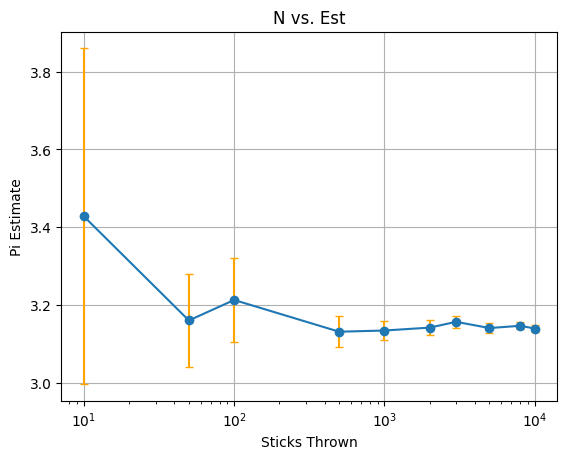

In [ ]:
tcrit = 2.045  # 95% with df=29

vals= [10, 50, 100, 500, 1000, 2000, 3000, 5000, 8000, 10000]
est=[]
s=[]
for n in vals:
  x=[]
  for i in range(30):
    x.append(2*n/buffon(n, 1, 1, 5))
  est.append(np.mean(x))
  s.append(tcrit*np.nanstd(x,ddof=1)/np.sqrt(30))




plt.errorbar(vals, est, yerr=s, fmt='o-', capsize=3, ecolor='orange')
#plt.plot(vals, est, yerr=s, marker='o')
plt.xlabel("Sticks Thrown")
plt.xscale('log')
plt.ylabel("Pi Estimate")
plt.title("N vs. Est")
plt.grid(True)

plt.show()



---

**(b)** You may notice from your plot in part (a) that the estimator $\hat{\pi}_n$ has some *bias*, i.e., $\mathbb{E}[\hat{\pi}_n] \neq \pi$ (this may be more apparent for small values of $n$). Pick a small value (say, $n=100$), and do more replications (i.e., do multiple experiments, where in each experiment you throw $100$ needles), and determine if $\hat{\pi}_n$ is an overestimate or underestimate for $\pi$.


---


### Ans.

In [ ]:
count=0
z=100000
for i in range(z):
  x= 2*100/buffon(100, 1, 1, 5)
  if x>np.pi:
    count+=1
  sum+=x
print("Proportion of "+str(z)+" estimates that overestimate: "+str(count/z))
print("Mean:"+str(sum/z))

# We can see that it is slightly overestimating pi

Proportion of 100000 estimates that overestimate: 0.48282
Mean:3.1637884814693833


**(c)** Can you mathematically justify your observation from part (b)?

### Ans.

Yes. Jenson's inequality states that for a convex function f and rv X, $E[f(x)] \ge f(E[X])$. In this scenario, f(x) has a non-neg integer in the numerator, and the rv in the denominator, meaning it takes form of $\tfrac 1x$, so for x>0 we have a strictly convex function ($f(x)^{''}=\frac{2}{x^3}>0$).

$E[f(x)] \ge f(E[X])\\
E[\frac{1}{N_{cross}}] \ge \frac{1}{E[N_{cross}]}\\
E\left[\frac{1}{N_{cross}}\right] \ge \frac{1}{n(2/\pi)}=\frac{\pi}{2n}\\
E[π_{hat_n}]=E[\frac{2n}{N_{cross}}]=2nE[\frac{1}{N_{cross}}]\\
\text{Using the inequality from Jenson we then have:}\\
E[\pi_{hat_n}] \ge \pi$

**(d)** Note however that you can still use Buffon's experiment to get an estimate with $95$\% confidence intervals for $\mathbb{E}[\frac{N_{\text{cross}}}{n}]$. Using this, can you get a $95$\% confidence interval for $\pi$? (Note: this need not be symmetric about $\pi$).

### Ans.

Yes. We can accomplish this by using the fact that confidence intervals are preserved through monotone 1 to 1 transforms. If we let x= $N_{cross}/n$, then our pi estimator = 2/x, which is a decreasing function. Therefore, we swap the upper and lower bounds (use upper bound of x for lower bound of pi estimator) and get that our confidence interval is $[2/x_{upper}, 2/x_{lower}]$

**(e) (Optional for everyone!)** Try to convince yourself (by linearity of expectation), that

(i) If you randomly throw $n$ matches of length $\ell$ and let $N^{\ell}_{\text{cross}}$ be a count of how many times these cross the lines, then $\frac{\mathbb{E}[N^{\ell}_{\text{cross}}]}{\ell} = $ constant (in other words, the expected number of crossings is proportional to $\ell$). Note: if $\ell>1$, each match may cross multiple lines.

(ii) The above result remains true if you throw *any* line segment (with any shape) of length $\ell$. Using this, can you see an easy way to compute $\mathbb{E}[N^{1}_{\text{cross}}]$ (i.e., the probability of a match crossing a line in the original experiment)?

## Question 4: Overbooking (25 points)

A website called Tixmaster is in charge of selling tickets for an upcoming Taylor Swift concert in Ithaca. The concert will take place in the State Theater, which has an official capacity of $1500$ seats. You believe however that Tixmaster has sold $1600$ tickets (representatives of the company, when contacted, denied this$\ldots$).

The show starts at 7pm, and if a ticket holder hasn't shown up by that time, then they are not allowed to enter anymore so as to not disturb the other attendees. From experience, you believe that there is a 95\% chance that someone who has bought a ticket actually shows up by 7pm. and that people show up (or not) independently from one another.



---

**(a)** You wait inside the State Theater and count the number of people entering. What is the probability that you will be able to prove that Tixmaster is overbooking? (You can do this with or without simulation)


---

### Ans.

T= sum $X_i$

$X_i$ is bernoulli with p= .95

T is a binomial(1600, .95)

P(T>1500) is similar to normal dist, so P is approximately 98.91%

**(b)** You manage to catch Tixmaster overbooking this time, and to prevent it in future, you decide to impose a fine to try and disincentivize overbooking. You know Tixmaster earns 100 in profit for every ticket sold (whether the holder shows up or not). You again have an agent counting how many people show up to the concert by $7$pm (you can not see how many are late or no-shows), and can charge Tixmaster a fine of 500 for each person exceeding the capacity.

Use a simulation to estimate how many extra tickets (over 1500) Tixmaster will sell, if they are trying to maximize their expected profit (after paying any fines).

### Ans.

P = 150000+100x-500*max(T-1500,0)





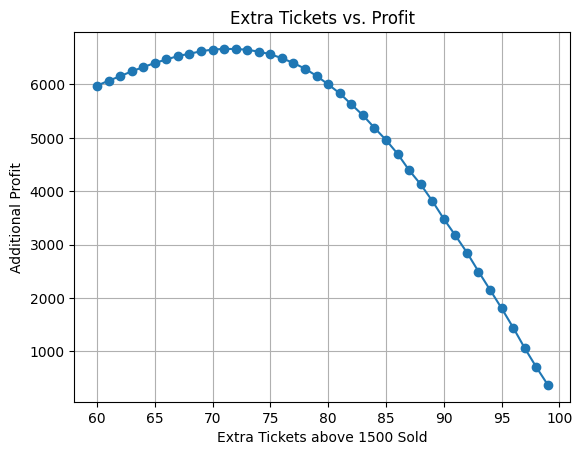

In [ ]:
avg_profit=[]
l=60
h=100
for x in range(l,h):
  p=[]
  for t in range(50000):
    y=np.random.binomial(1500+x, .95)
    p.append(100*x-500*np.max([0, y-1500]))

  avg_profit.append(np.average(p))

x = range(l,h)

plt.plot(x, avg_profit, marker='o')
plt.xlabel("Extra Tickets above 1500 Sold")
plt.ylabel("Additional Profit")
plt.title("Extra Tickets vs. Profit")
plt.grid(True)

plt.show()


It appears that selling 1572 tickets will optimize their profitability



---



**(c) (For 5580/5581 students; optional for 4580)** Finally, you decide to stamp down on any overbooking by setting a large enough penalty so that Tixmaster does not find it profitable to sell even one extra ticket. Use simulation to find a fee $F$ charged per person over $1600$ admitted to the theater, such that it stops overbooking for each person who book after the number tickets sold exceed the capacity. (Ideally, try to propose as small an $F$ as possible, so that the city government feels it is practical to implement).

*(Note: This sort of a problem where you want to optimize a parameter via simulation is difficult. We will see some ways to do this more efficiently later in class; however, for this problem, it is easy to do a search over potential values of $F$ to find the first time that overbooking by even $1$ ticket becomes unprofitable.)*


---



### Ans.